## 1차원 데이터
- 평균값(기댓값), 표본분산, 불편분산(ddof=1), 표준편차
- 표본분산은 표본의 평균을 사용해서 분산을 계산한 값으로 분산을 과소 추정하는 경향이 있으며 그 경향을 없애기 위한 것이 불편분산임. 표본분산 보다 조금 큰 값이 된다.
- 표준화 : 평균값이 큰 변수와 작은 변수가 섞여 있으면 다루기 어려우므로 표준화로 데이터를 비교하기 쉽게 한다.
- 최댓값, 최솟값, 중앙값, 사분위수
- 표본분산과 비편향 분산
  - 분산은 표본 분산과 불편분산(unbiased variance)의 두 종류가 존재
  - 표본 분산은 표본에서 계산된 분산이며 모집단에 비해 표본수가 적을 때는 표본 분산이 모분산보다 작아진다.
  - 즉 표본 분산이 모집단 분산에 맞춰서 동일하게 보정한 것을 비편향 분산이라 한다.
  - 통계학에서는 이 비편향분산을 사용하는 경우가 많다.
  - 불편분산은 n대신 n-1로 나누어 구할 수 있다.

[표분분산이 분산을 과소 평가하는 이유]

- 호수안에 물고기가 7마리가 있다. 몸길이 {1,2,3,4,5,6,7}, 모평균 4, 샘플링1 3마리{1,2,3} 표본평균 2, 샘플링2 {5,6,7} 표본평균 6
- 이때 분산은 모평균을 모르기 때문에 표본평균과의 거리를 계산하며 분산을 과소평가 하게된다.
- 표본 분산 보다 조금 더 큰 값이 되도록 보정하기 위하여 N대신 N-1로 나누어 불편분산을 구할 수 있다.

#### 0822[과제] 교재  ~p.51 코드 문제 풀기

In [2]:
import numpy as np
import pandas as pd

# 소수점 이하 3자리 제한
%precision 3

df = pd.read_csv('ch2_scores_em.csv', index_col='student number')
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [2]:
scores = np.array(df['english'])[:10]
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58], dtype=int64)

In [3]:
scores_df = pd.DataFrame({'scores':scores}, 
                         index=pd.Index(['A','B','C','D','E','F','G','H','I','J'], 
                                       name='student'))
scores_df

,scores
student,
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65


### 평균값

In [4]:
print(sum(scores)/len(scores))
print(np.mean(scores))
scores_df.mean()

55.0
55.0


scores    55.0
dtype: float64

### 중앙값

In [5]:
sorted_scores = np.sort(scores)
sorted_scores

array([41, 42, 48, 49, 56, 57, 58, 65, 65, 69], dtype=int64)

In [6]:
# if 짝수 -> n/2 와 (n/2)+1 의 평균값
# else 홀수 -> (n+1)/2 데이터가 중앙값

n = len(sorted_scores)
if n % 2 == 0:
    m0 = sorted_scores[n//2-1]
    m1 = sorted_scores[n//2]
    median = (m0+m1)/2
else:
    median = sorted_scores[(n+1)//2 - 1]
median

56.500

In [7]:
print(np.median(scores))
scores_df.median()

56.5


scores    56.5
dtype: float64

### 최빈값

In [8]:
pd.Series([1,1,1,2,2,3]).mode()

0    1
dtype: int64

In [9]:
pd.Series([1,2,3,4,5]).mode()

0    1
1    2
2    3
3    4
4    5
dtype: int64

### 편차

In [10]:
mean = np.mean(scores)
deviation = scores - mean
deviation

array([-13.,  14.,   1., -14.,   2.,  -7.,  10.,  -6.,  10.,   3.])

In [11]:
another_scores = [50, 60, 58, 54, 51, 56, 57, 53, 52, 59]
another_mean = np.mean(another_scores)
another_deviation = another_scores - another_mean
another_deviation

array([-5.,  5.,  3., -1., -4.,  1.,  2., -2., -3.,  4.])

In [13]:
# 표준 편차의 평균은 0
print(np.mean(deviation))
np.mean(another_deviation)

0.0


0.000

In [14]:
summary_df = scores_df.copy()
summary_df['deviation'] = deviation
summary_df

,scores,deviation
student,,
A,42,-13.0
B,69,14.0
C,56,1.0
D,41,-14.0
E,57,2.0
F,48,-7.0
G,65,10.0
H,49,-6.0
I,65,10.0


In [15]:
summary_df.mean()

scores       55.0
deviation     0.0
dtype: float64

### 분산

In [17]:
# 양수, 음수 상관없이 모두 평균에서 10 만큼 떨어져 있음. 그래서 제곱 이용
# numpy는 표본분산 사용
print(np.mean(deviation ** 2))
print(np.var(scores))

# pandas는 불편분산 사용
scores_df.var()

86.0
86.0


scores    95.555556
dtype: float64

In [18]:
summary_df['square of deviation'] = np.square(deviation)
summary_df

,scores,deviation,square of deviation
student,,,
A,42,-13.0,169.0
B,69,14.0,196.0
C,56,1.0,1.0
D,41,-14.0,196.0
E,57,2.0,4.0
F,48,-7.0,49.0
G,65,10.0,100.0
H,49,-6.0,36.0
I,65,10.0,100.0


In [19]:
summary_df.mean()

scores                 55.0
deviation               0.0
square of deviation    86.0
dtype: float64

### 표준편차

In [20]:
np.sqrt(np.var(scores, ddof=0))

9.274

In [21]:
np.std(scores, ddof=0)

9.274

### 범위 / 사분위 범위

In [22]:
# 범위
np.max(scores) - np.min(scores)

28

In [23]:
# 사분위 범위
scores_Q1 = np.percentile(scores, 25)
scores_Q3 = np.percentile(scores, 75)
scores_IQR = scores_Q3 - scores_Q1
scores_IQR

15.000

### 데이터의 지표 정리

In [24]:
pd.Series(scores).describe()

count    10.000000
mean     55.000000
std       9.775252
min      41.000000
25%      48.250000
50%      56.500000
75%      63.250000
max      69.000000
dtype: float64

#### 0822 [과제] 20개 원소로 구성되는 배열을 만든 후, 평균, 편차 및 편차의 합을 구하세요.

In [7]:
np.random.seed(0)
array = np.random.randint(1, 300, 20)
print(f'array : {array}')
print(f'mean : {array.mean()}')

array : [173  48 118 193 252 196  10 212 278 243 293  88  71  89 194  40  88 175
  89 166]
mean : 150.8


In [8]:
deviation = array - np.mean(array)
deviation

array([  22.2, -102.8,  -32.8,   42.2,  101.2,   45.2, -140.8,   61.2,
        127.2,   92.2,  142.2,  -62.8,  -79.8,  -61.8,   43.2, -110.8,
        -62.8,   24.2,  -61.8,   15.2])

In [9]:
deviation.sum()

-0.000

#### 0822 [과제] 중앙값 > 평균값 인 경우와 중앙값 < 평균값인 두가지 집합에서 나타나는 가능성 있는 특징을 사례로 설명하세요.

In [5]:
# 중앙값 > 평균값
a = [1, 3, 30, 31, 32]
print(np.mean(a))
np.median(a)

19.4


30.000

In [6]:
# 중앙값 < 평균값
b = [1, 3, 5, 7, 100]
print(np.mean(b))
np.median(b)

23.2


5.000

#### 0822 [과제]  4분위를 이용하여 이상치를 구하는 사례를 생성하고 시각화 및 이상치 산출하는 과정을 설명하세요.

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# 소수점 이하 3자리 제한
%precision 3

df = pd.read_csv('ch2_scores_em.csv', index_col='student number')
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [15]:
df.describe()

,english,mathematics
count,50.000000,50.000000
mean,58.380000,78.880000
std,9.799813,8.414371
min,37.000000,57.000000
25%,54.000000,76.000000
50%,57.500000,80.000000
75%,65.000000,84.000000
max,79.000000,94.000000


In [16]:
df_Q1 = df.quantile(0.25)
df_Q3 = df.quantile(0.75)
df_IQR = df_Q3 - df_Q1
df_IQR

english        11.0
mathematics     8.0
dtype: float64

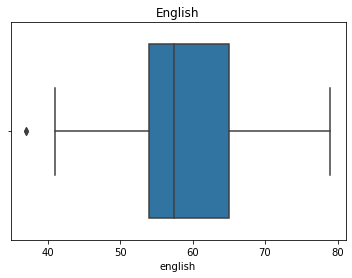

In [17]:
sns.boxplot(x="english", data=df)
plt.title("English")
plt.show()

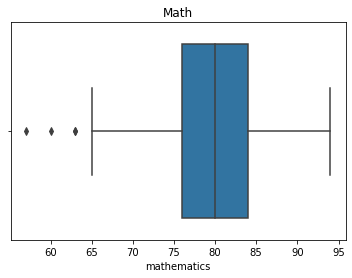

In [18]:
sns.boxplot(x="mathematics", data=df)
plt.title("Math")
plt.show()

In [20]:
a = df_Q1 - 1.5*df_IQR
a

english        37.5
mathematics    64.0
dtype: float64

#### 0822 [과제] 표본 분산과 불편 분산의 차이를 사례를 들어 설명하세요.

##### 표본분산 : NumPy / 불편분산 : Pandas

- 표본분산 : 분산을 과소 추정함
- 불편분산 : 분산을 과소 추정하지 않음. ** 총 len에서 -1 해줌(자유도)

In [13]:
np.random.seed(1)
variance = np.random.randint(1, 50, 10)
print(variance)
print(variance.mean())

[38 44 13  9 10 12  6 16  1 17]
16.6


In [28]:
print(f'표본분산 : {np.var(variance)}')
print(f'불편분산 : {variance.var(ddof=1)}') # ddof=1 자유도 주기

표본분산 : 170.04000000000002
불편분산 : 188.93333333333334


In [24]:
ar = np.array([40, 70, 67, 132, 183, 23, 99, 300, 200, 100])
np.var(ar)

6485.240

In [27]:
ar.var(ddof=1)

7205.822

In [8]:
import pandas as pd
import numpy as np

df = pd.read_csv('ch2_scores_em.csv')
df.head()

,student number,english,mathematics
0,1,42,65
1,2,69,80
2,3,56,63
3,4,41,63
4,5,57,76


In [9]:
scores = np.array(df.english)[:10]

In [11]:
scores_df = pd.DataFrame({'score':scores},
                        index=pd.Index(['A','B','C','D','E','F','G','H','I','J'], 
                                       name='student'))
scores_df

,score
student,
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65


In [12]:
z = (scores - np.mean(scores)) / np.std(scores)
z

array([-1.402,  1.51 ,  0.108, -1.51 ,  0.216, -0.755,  1.078, -0.647,
        1.078,  0.323])

In [13]:
# 편차값은 평균이 50, 표준편차가 10이 되도록 정규화한 값
z = 50+10*z
scores_df['deviation_value'] = z
scores_df

,score,deviation_value
student,,
A,42,35.981739
B,69,65.096588
C,56,51.078328
D,41,34.903412
E,57,52.156655
F,48,42.451706
G,65,60.783277
H,49,43.530034
I,65,60.783277


#### Box plot 의미 해석

* IQR(Inter Quartile Range): 제 3사분위수 - 제1사분위수
* lower whisker: Q1 - 1.5 x IQR 이내인 값 중에서 최솟값
* upper whisker: Q3 + 1.5 x IQR 이내인 값 중에서 최댓값
* 이상치: lower whisker, upper whisker를 벗어나는 값

#### [과제 0823_1]
p.52 ~ p.83 예제 문제 풀어보기

In [22]:
import pandas as pd
import numpy as np

df = pd.read_csv('ch2_scores_em.csv')
df.head()

,student number,english,mathematics
0,1,42,65
1,2,69,80
2,3,56,63
3,4,41,63
4,5,57,76


In [24]:
scores = np.array(df.english)[:10]

In [25]:
scores_df = pd.DataFrame({'score':scores},
                        index=pd.Index(['A','B','C','D','E','F','G','H','I','J'], 
                                       name='student'))
scores_df

,score
student,
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65


### 표준화

In [26]:
z = (scores - np.mean(scores)) / np.std(scores)
z

array([-1.402,  1.51 ,  0.108, -1.51 ,  0.216, -0.755,  1.078, -0.647,
        1.078,  0.323])

In [27]:
# 표준화 된 데이터는 평균이 0, 표준편차가 1

np.mean(z), np.std(z,ddof=0)

(-0.000, 1.000)

### 편찻값
평균이 50, 표준편차 10

In [28]:
z = 50+10*z
z

array([35.982, 65.097, 51.078, 34.903, 52.157, 42.452, 60.783, 43.53 ,
       60.783, 53.235])

In [29]:
scores_df['deciation value'] = z
scores_df

,score,deciation value
student,,
A,42,35.981739
B,69,65.096588
C,56,51.078328
D,41,34.903412
E,57,52.156655
F,48,42.451706
G,65,60.783277
H,49,43.530034
I,65,60.783277


In [30]:
english_scores = np.array(df['english'])

pd.Series(english_scores).describe()

count    50.000000
mean     58.380000
std       9.799813
min      37.000000
25%      54.000000
50%      57.500000
75%      65.000000
max      79.000000
dtype: float64

### 도수분포표

In [32]:
freq, _ = np.histogram(english_scores, bins=10, range=(0,100))
freq

array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0], dtype=int64)

In [33]:
freq_class = [f'{i}~{i+10}' for i in range(0, 100, 10)]

freq_dist_df = pd.DataFrame({'frequency':freq},
                           index=pd.Index(freq_class,
                                         name='class'))
freq_dist_df

,frequency
class,
0~10,0
10~20,0
20~30,0
30~40,2
40~50,8
50~60,16
60~70,18
70~80,6
80~90,0


In [34]:
# 계급값 : 각 계급 대표 값
class_value = [(i+(i+10))//2 for i in range(0,100, 10)]
class_value

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

In [35]:
# 상대도수 : 비율
rel_freq = freq/ freq.sum()
rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.16, 0.32, 0.36, 0.12, 0.  , 0.  ])

In [36]:
# 누적상대도수
cum_rel_freq = np.cumsum(rel_freq)
cum_rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.2 , 0.52, 0.88, 1.  , 1.  , 1.  ])

In [38]:
freq_dist_df['class value'] = class_value
freq_dist_df['relative frequency'] = rel_freq
freq_dist_df['cumulative relative frequency'] = cum_rel_freq
freq_dist_df = freq_dist_df[['class value', 'frequency', 'relative frequency', 'cumulative relative frequency']]
freq_dist_df

,class value,frequency,relative frequency,cumulative relative frequency
class,,,,
0~10,5,0,0.00,0.00
10~20,15,0,0.00,0.00
20~30,25,0,0.00,0.00
30~40,35,2,0.04,0.04
40~50,45,8,0.16,0.20
50~60,55,16,0.32,0.52
60~70,65,18,0.36,0.88
70~80,75,6,0.12,1.00
80~90,85,0,0.00,1.00


In [41]:
# 최빈값 재검토
freq_dist_df.loc[freq_dist_df['frequency'].idxmax(), 'class value']

65

### 히스토그램

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

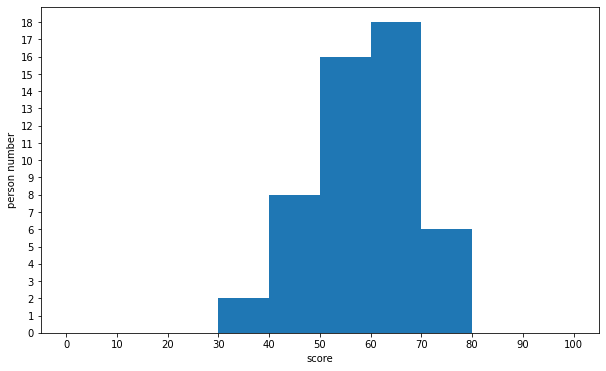

In [45]:
# 계급 폭 10, 계급 수 10
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

freq, _, _ = ax.hist(english_scores, bins=10, range=(0,100))
ax.set_xlabel('score')
ax.set_ylabel('person number')
ax.set_xticks(np.linspace(0,100,10+1))
ax.set_yticks(np.arange(0, freq.max()+1))

plt.show()

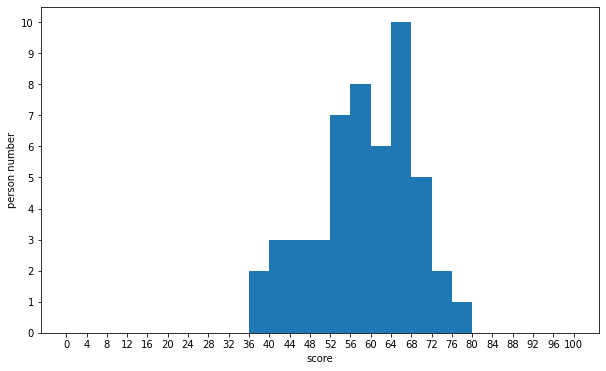

In [46]:
# 계급 폭 4, 계급 수 25
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

freq, _, _ = ax.hist(english_scores, bins=25, range=(0,100))
ax.set_xlabel('score')
ax.set_ylabel('person number')
ax.set_xticks(np.linspace(0,100,25+1))
ax.set_yticks(np.arange(0, freq.max()+1))

plt.show()

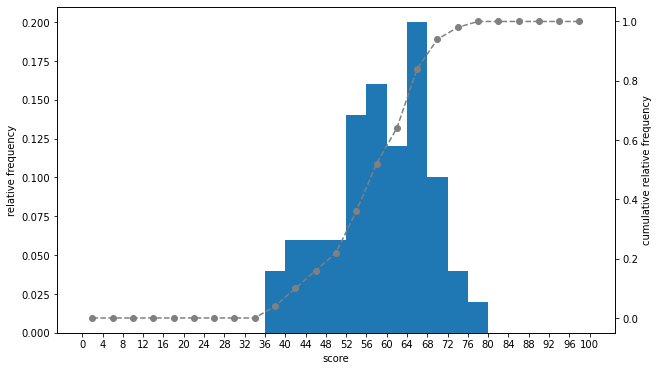

In [47]:
# 꺾은선 그래프와 함께 그리는 히스토그램

fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(111)

# Y축 스케일 -> 다른 그래프를 ax1과 동일한 영역에 생성
ax2 = ax1.twinx()

#도수를 데이터의 수로 나눔
weights = np.ones_like(english_scores) / len(english_scores)
rel_freq, _, _ = ax1.hist(english_scores, bins=25, range=(0,100), weights=weights)

# 누적 상대도수
cum_rel_freq = np.cumsum(rel_freq)
# 계급값
class_value = [(i+(i+4))//2 for i in range(0, 100, 4)]

# 꺾은선 그래프 그리기!
ax2.plot(class_value, cum_rel_freq, ls='--', marker='o', color='gray')

# 꺾은선 그래프 눈금 X
ax2.grid(visible=False)

ax1.set_xlabel('score')
ax1.set_ylabel('relative frequency')
ax2.set_ylabel('cumulative relative frequency')
ax1.set_xticks(np.linspace(0, 100, 25+1))

plt.show()

### 상자그림 (box plot)

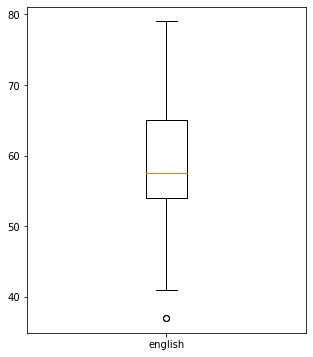

In [48]:
fig = plt.figure(figsize=(5,6))
ax = fig.add_subplot(111)
ax.boxplot(english_scores, labels=['english'])

plt.show()

## 2차원 데이터

In [49]:
import numpy as np
import pandas as pd

%precision 3
df = pd.read_csv('ch2_scores_em.csv', index_col = 'student number')

In [50]:
en_scores = np.array(df['english'])[:10]
ma_scores = np.array(df['mathematics'])[:10]

scores_df = pd.DataFrame({'english':en_scores, 'mathematics':ma_scores},
                        index=pd.Index(['A','B','C','D','E','F','G','H','I','J'],
                                      name='student'))
scores_df

,english,mathematics
student,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76
F,48,60
G,65,81
H,49,66
I,65,78


### 공분산

In [53]:
summary_df = scores_df.copy()
summary_df['english_deviation'] = summary_df['english'] - summary_df['english'].mean()
summary_df['mathematics_deviation'] = summary_df['mathematics'] - summary_df['mathematics'].mean()
summary_df['product of deviations'] = summary_df['english_deviation'] * summary_df['mathematics_deviation']
summary_df

,english,mathematics,english_deviation,mathematics_deviation,product of deviations
student,,,,,
A,42,65,-13.0,-6.4,83.2
B,69,80,14.0,8.6,120.4
C,56,63,1.0,-8.4,-8.4
D,41,63,-14.0,-8.4,117.6
E,57,76,2.0,4.6,9.2
F,48,60,-7.0,-11.4,79.8
G,65,81,10.0,9.6,96.0
H,49,66,-6.0,-5.4,32.4
I,65,78,10.0,6.6,66.0


In [54]:
summary_df['product of deviations'].mean()

62.800

In [55]:
cov_mat = np.cov(en_scores, ma_scores, ddof=0)
cov_mat

array([[86.  , 62.8 ],
       [62.8 , 68.44]])

In [56]:
cov_mat[0,1], cov_mat[1,0]

(62.800, 62.800)

In [57]:
cov_mat[0,0], cov_mat[1,1]

(86.000, 68.440)

In [59]:
np.var(en_scores, ddof=0), np.var(ma_scores, ddof=0)

(86.000, 68.440)

### 상관계수

In [60]:
np.cov(en_scores, ma_scores, ddof=0)[0,1]/ (np.std(en_scores)*np.std(ma_scores))

0.819

In [61]:
np.corrcoef(en_scores, ma_scores)

array([[1.   , 0.819],
       [0.819, 1.   ]])

In [62]:
scores_df.corr()

,english,mathematics
english,1.000000,0.818569
mathematics,0.818569,1.000000


### 산점도 (scatter)

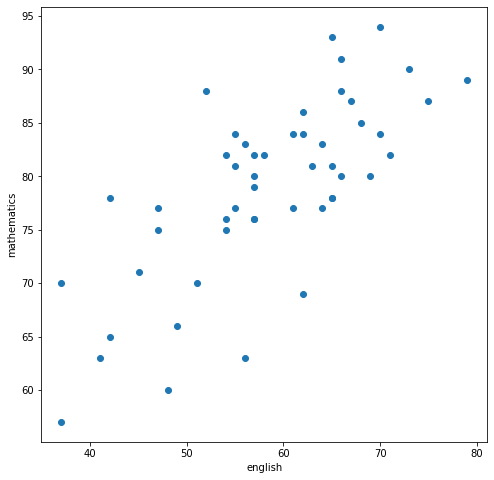

In [63]:
english_scores = np.array(df['english'])
math_scores = np.array(df['mathematics'])

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.scatter(english_scores, math_scores)
ax.set_xlabel('english')
ax.set_ylabel('mathematics')

plt.show()

### 회귀 직선

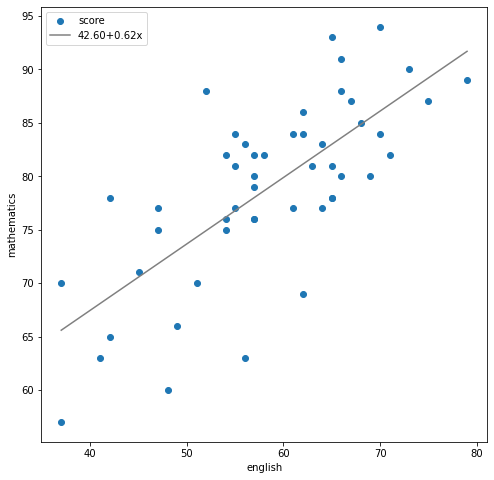

In [67]:
poly_fit = np.polyfit(english_scores, math_scores, 1)
poly_1d = np.poly1d(poly_fit)

xs = np.linspace(english_scores.min(), english_scores.max())
ys = poly_1d(xs)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.scatter(english_scores, math_scores, label = 'score')
ax.plot(xs, ys, color='gray', label=f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')
ax.set_xlabel('english')
ax.set_ylabel('mathematics')
ax.legend(loc='upper left')
plt.show()

### 히트맵

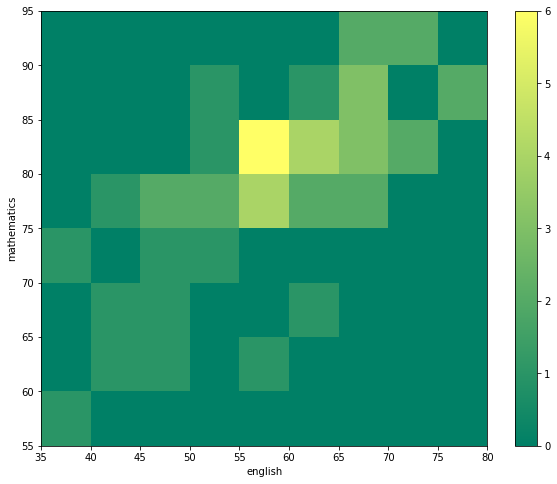

In [72]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

c = ax.hist2d(english_scores, math_scores, bins=[9,8],
             range=[(35,80),(55,95)], cmap='summer')
ax.set_xlabel('english')
ax.set_ylabel('mathematics')
ax.set_xticks(c[1])
ax.set_yticks(c[2])
fig.colorbar(c[3], ax=ax)
cmap = plt.get_cmap('bwr')
plt.show()

#### [과제 0823_2]
일차원 데이터를 생성하여 다음을 수행하세요.
- 도수분포표를 만들고 히스토그램으로 시각화하세요. (계급을 변경하여 2개를 작성)
- 상대도수 및 누적상대도수를 도수분포표에 추가하고 히스토그램과 누적상대도수를 시각화하세요.

In [90]:
np.random.seed(0)
ar = np.random.randint(1, 500, 20)
ar

array([173,  48, 118, 193, 324, 252, 196, 360,  10, 212, 278, 243, 293,
        88,  71, 473,  89, 397, 315, 194])

In [91]:
freq, _ = np.histogram(ar, bins=10, range=(0,500))
freq

array([2, 3, 1, 4, 2, 3, 2, 2, 0, 1], dtype=int64)

In [95]:
freq_class = [f'{i}~{i+50}' for i in range(0, 500, 50)]

freq_dist_df = pd.DataFrame({'frequency':freq},
                           index=pd.Index(freq_class,
                                         name='class'))
freq_dist_df

,frequency
class,
0~50,2
50~100,3
100~150,1
150~200,4
200~250,2
250~300,3
300~350,2
350~400,2
400~450,0


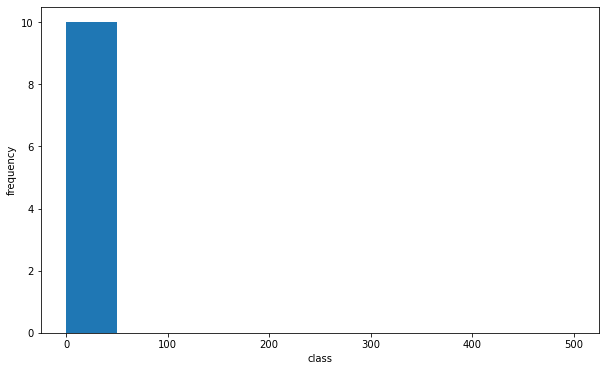

In [100]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

freq, _, _ = ax.hist(freq_dist_df, bins=10, range=(0,500))
ax.set_xlabel('class')
ax.set_ylabel('frequency')
ax.set_xticks(np.linspace(0,500,50+1))
ax.set_yticks(np.arange(0, freq.max()+1))

plt.show()

#### [과제 0823_3]
이차원 데이터를 생성하여 다음을 수행하세요.(데이터 수 각각 1000개 이상)
- 공분산 및 상관계수를 구하세요.
- 이차원 데이터를 산점도, 히트맵으로 시각화한 후 인사이트를 기술하세요.